In [5]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal
from langgraph.types import interrupt

class State(TypedDict):
    a: int

In [9]:
def main_node(state):
    print("I am a worthless main_node")
    return ({'a': state['a'] + 5})

def condition(state) -> Literal['__end__', 'interrupt_node']:
    if(state['a']) < 10:
        return "__end__"
    else:
        return "interrupt_node"
    
def interrupt_node(state):
    user_value = interrupt("Please Fuck Yourself in the ass: ")
    return ({'a': user_value})

In [10]:
builder = StateGraph(State)

builder.add_node('main_node', main_node)
builder.add_node('interrupt_node', interrupt_node)

builder.add_edge(START, "main_node")
builder.add_conditional_edges("main_node", condition)
builder.add_edge('interrupt_node', 'main_node')

graph = builder.compile()

In [11]:
graph.invoke({'a': 1})

I am a worthless main_node


{'a': 6}

In [12]:
graph.invoke({'a': 10})

I am a worthless main_node


{'a': 15,
 '__interrupt__': [Interrupt(value='Please Fuck Yourself in the ass: ', id='112863335a48bba62128c98212cc36cd')]}

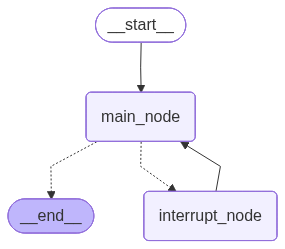

In [14]:
from IPython.display import Image
from langgraph.graph import END, StateGraph, START


Image(graph.get_graph().draw_mermaid_png())

In [ ]:
builder.compile()